In [ ]:
ls

final_data.csv  sample_data/


Let's proceed with the following steps to achieve feature selection using Random Forest and then build a machine learning model to predict the price of the property:

Load the Data: Load the dataset and inspect it.
Preprocess the Data: Handle missing values, encode categorical variables, and scale numerical features if necessary.
Feature Selection: Use Random Forest to determine feature importance.
Model Building: Use the selected features to build a machine learning model (e.g., Linear Regression, Random Forest, etc.) to predict the price.
Evaluate the Model: Evaluate the performance of the model using appropriate metrics.
Let's start with loading and inspecting the data.

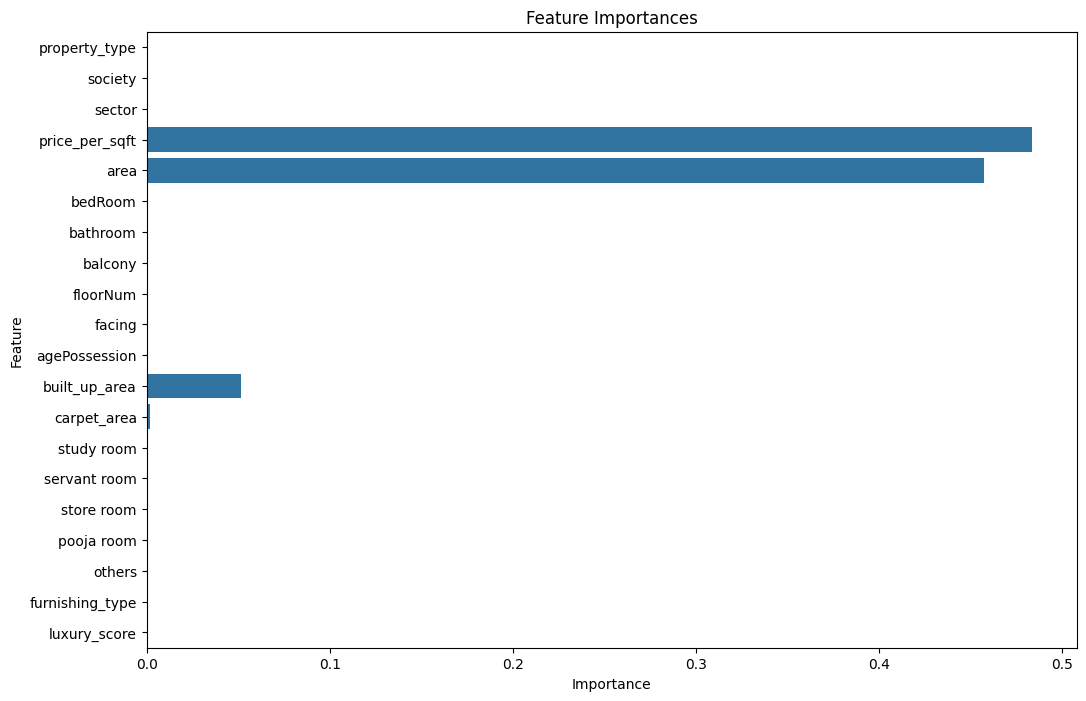

Preprocessing and feature importance analysis completed.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('final_data.csv')
df = df.drop(columns=['areaWithType'])
df['balcony'] = df['balcony'].replace('3+', '4')
# Encode categorical variables
label_encoders = {}
categorical_columns = ['property_type', 'society', 'sector', 'facing', 'agePossession', 'furnishing_type']
for col in categorical_columns:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])
    label_encoders[col] = label

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['price', 'price_per_sqft', 'area', 'built_up_area', 'carpet_area', 'luxury_score']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Prepare data for Random Forest
X = df.drop(columns=['price'])
y = df['price']

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print('Preprocessing and feature importance analysis completed.')

Random Forest model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.006707365046505068


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.07121716866396541


Therefore Random Forest model performs better as it has the mean squared error less than Linear Regression model.